##  A- Handle Missing values by Replacing them with Zero

In [77]:
import pandas as pd 

In [78]:
df=pd.read_csv('data.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [ ]:
df.shape

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()


In [ ]:
df1 = df.sample(frac =.05)
df1.shape

In [ ]:
import datasist as ds #import datasist library
ds.structdata.describe(df1)

In [ ]:
ds.structdata.display_missing(df1)

In [ ]:
import matplotlib.pyplot as plt
ds.visualizations.countplot(df1)

In [ ]:
ds.visualizations.histogram(df1)

In [ ]:
df1.isnull().sum()

In [ ]:
df1.isnull().sum().sum()

In [ ]:
df1.info()

In [ ]:
df1.describe()

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df1)


##  A- Handle Missing values by Replacing them with Zero

In [ ]:
df11=df1.fillna(0)

In [ ]:
df11.isnull().sum().sum()

In [ ]:
X=df11.iloc[:,1:-1].values
y=df11.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
print(X.shape)

In [ ]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

In [ ]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

# 1- Decision Tree by Replacing with Zero

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tree.fit(X_train,y_train)

In [ ]:
print('The accuracy of Decision Tree : ',tree.score(X_train,y_train))

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=tree.predict(X_test)


In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree")
plt.scatter(y_test,prediction)
plt.plot([-4,2],[-40000,60000],color='red')
plt.show()  


In [ ]:
import seaborn as sns
sns.distplot((y_test-prediction), bins=10)

In [ ]:
sns.heatmap(df11.corr())

## 2- Random Forest by Replacing with Zero 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forst.fit(X_train,y_train)

In [ ]:
print('The accuracy of Random Forest : ',forst.score(X_train,y_train))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=forst.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(y_test,prediction)
plt.plot([-6,4],[-6,4],color='red')
plt.show()

## 3- Linear Regression by Replacing with Zero

In [71]:
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Lin.fit(X_train,y_train)

LinearRegression()

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [73]:
Lin.intercept_

19468.513275

In [74]:
prediction=Lin.predict(X_test)


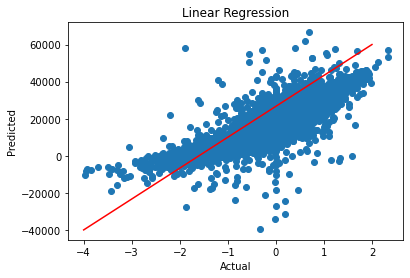

In [75]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")
plt.scatter(y_test,prediction)
plt.plot([-4,2],[-40000,60000],color='red')
plt.show()         


In [76]:
print('The accuracy of LinearRegression: ',Lin.score(X_train,y_train))

The accuracy of LinearRegression:  0.7225907077795535
